In [1]:
import numpy as np
import pandas as pd

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [7]:
df = pd.read_csv("../data/adult.csv", index_col=[0])

df.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,39
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,35
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,27
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,43
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,25


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32561 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   education       32561 non-null  object
 3   marital-status  32561 non-null  object
 4   occupation      30718 non-null  object
 5   relationship    32561 non-null  object
 6   race            32561 non-null  object
 7   sex             32561 non-null  object
 8   hours-per-week  32561 non-null  int64 
 9   native-country  31978 non-null  object
 10  salary          32561 non-null  object
 11  salary K$       32561 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 3.2+ MB


In [10]:
df = df.replace("?", np.nan)

In [18]:
df.loc[df["salary K$"] <= 50, "salary"] = "<=50K"
df.loc[df["salary K$"] > 50, "salary"] = ">50K"

# Task 1
Print the count of men and women in the dataset.

In [31]:
men = df[df["sex"] == "Male"]

total_men = men.shape[0]
total_men

21790

In [32]:
women = df[df["sex"] == "Female"]

total_women = women.shape[0]
total_women

10771

# Task 2
Find the average age of men in dataset

In [34]:
average_age_men = men["age"].mean()
average_age_men

np.float64(39.43354749885268)

# Task 3
Get the percentage of people from Poland (native-country)

In [37]:
poland_count = df[df["native-country"] == "Poland"].shape[0]
total_count = df.shape[0]
poland_percentage = (poland_count / total_count) * 100

poland_percentage

0.18426952489174164

# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [41]:
people_who_earn_over_fifty = df[df["salary"] == ">50K"]

people_who_earn_over_fifty["age"].mean()

np.float64(44.24984058155847)

In [42]:
people_who_earn_over_fifty["age"].std()

np.float64(10.519027719851826)

In [43]:
people_who_earn_below_fifty = df[df["salary"] == "<=50K"]

people_who_earn_below_fifty["age"].mean()

np.float64(36.78373786407767)

In [44]:
people_who_earn_below_fifty["age"].std()

np.float64(14.02008849082488)

# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [51]:
higher_education = np.array(["Bachelors", "Masters", "Assoc-acdm", "Assoc-voc", "Doctorate", "Prof-school"])

people_who_earn_over_fifty_without_higher_ed = people_who_earn_over_fifty[~people_who_earn_over_fifty["education"].isin(higher_education)]

people_who_earn_over_fifty_without_higher_ed.shape[0]

3306

# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [57]:
df.groupby(df["education"])["age"].describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
10th,933.0,37.429796,16.720713,17.0,22.00,34.0,52.0,90.0
11th,1175.0,32.355745,15.545485,17.0,18.00,28.0,43.0,90.0
12th,433.0,32.000000,14.334625,17.0,19.00,28.0,41.0,79.0
1st-4th,168.0,46.142857,15.615625,19.0,33.00,46.0,57.0,90.0
5th-6th,333.0,42.885886,15.557285,17.0,29.00,42.0,54.0,84.0
7th-8th,646.0,48.445820,16.092350,17.0,34.25,50.0,61.0,90.0
9th,514.0,41.060311,15.946862,17.0,28.00,39.0,54.0,90.0
Assoc-acdm,1067.0,37.381443,11.095177,19.0,29.00,36.0,44.0,90.0
Assoc-voc,1382.0,38.553546,11.631300,19.0,30.00,37.0,46.0,84.0


# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [63]:
married_men = men[men["marital-status"].str.startswith("Married")]
married_men["salary K$"].mean()

np.float64(106.35617753489403)

In [66]:
non_married_men = men[~men["marital-status"].str.startswith("Married")]
non_married_men["salary K$"].mean()

np.float64(45.977088131894774)

# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [67]:
max_hours = df["hours-per-week"].max()
max_hours

np.int64(99)

In [69]:
df[df["hours-per-week"] == max_hours].shape[0]

85

# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

In [70]:
df.corr(numeric_only=True)

,age,hours-per-week,salary K$
age,1.000000,0.068756,0.201774
hours-per-week,0.068756,1.000000,0.196916
salary K$,0.201774,0.196916,1.000000


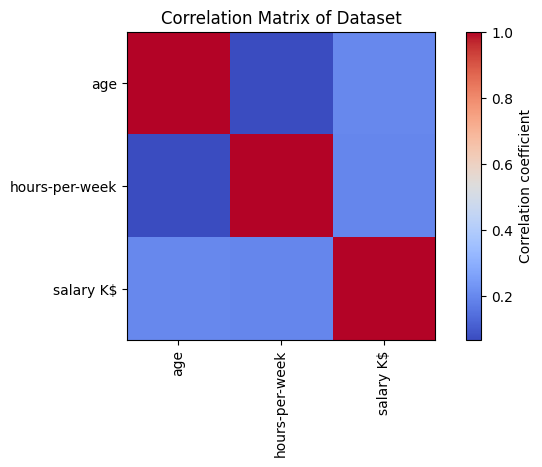

In [73]:
import matplotlib.pyplot as plt
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(8, 4))
plt.imshow(correlation_matrix, cmap="coolwarm", interpolation="none")
plt.colorbar(label="Correlation coefficient")
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title("Correlation Matrix of Dataset")
plt.show()
